# AGRUPAMIENTO (Clustering)

## 4.0 El Problema del Tamaño de una Polera

Considere el caso de una empresa que va a lanzar al mercado un nuevo modelo de poleras. Como la empresa espera 
fabricar modelos en diferentes medidas para satisfacer a personas de todos los tamaños, esta obtiene datos
de la altura y el peso de las personas de la región en donde venderá las poleras, y los grafica en un gráfico, 
como se muestra más abajo.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
im = np.array(Image.open('data/Poleras.png'))
plt.figure(figsize=(10, 10))
plt.imshow(im)

La empresa no puede crear poleras de todos los tamaños. En su lugar, divide a las personas en Pequeñas, 
Medianas y Grandes, y fabrican solo estos 3 modelos que se adaptarán a todas las personas. ¿Cómo
podemos determinar los mejores tamaños considerando los pesos y altura de toda la población?

Se puede resolver este problema mediante un algoritmo de agrupación de personas segun talla y peso 
que proporcionará los mejores grupos que satisfarán a todas las personas. Este algoritmo
va a dividir a la poblacion en k grupos (3 inicialmente en este caso), y si estos k grupos no son suficientes 
para cumplir el objetivo, dividirá los datos de la poblacíon en k+1 más grupos y continuará hasta que la compañia 
esté satisfecha.

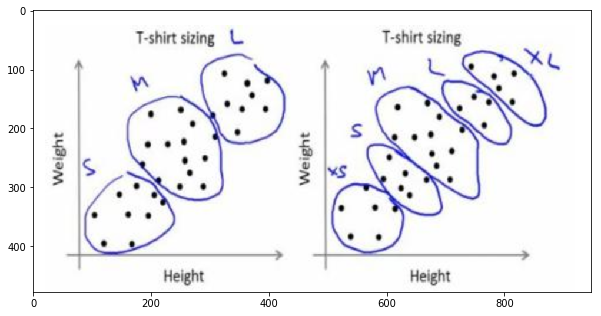

In [2]:
poleras_2 = np.array(Image.open('data/Poleras2.png'))
plt.figure(figsize=(10, 10))
plt.imshow(poleras_2)

## 4.1 K-means

Un algoritmo que nos permite resolver el problema de la polera es K-means.

Para a entender como trabaja considere un conjunto de datos como se muestra a continuación. 


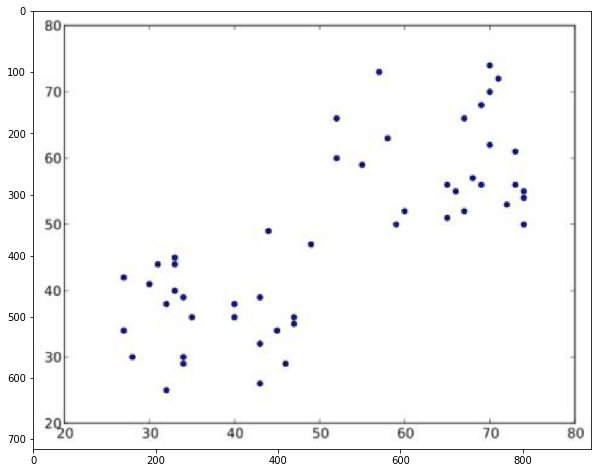

In [3]:
datos_0 = np.array(Image.open('data/k-means0.png'))
plt.figure(figsize=(10, 10))
plt.imshow(datos_0)

- Paso 1: El algoritmo elige aleatoriamente dos centroides, C1 y C2.

- Paso 2: Calcula la distancia desde cada punto a ambos centroides. Si uno de los datose está más cerca de C1, entonces ese dato se etiqueta con '0'. Si está más cerca de C2, se etiquetada como '1'.
Si hay más centroides, los datos son etiquetados como '2', '3', etc.

Para nuestro caso, se grafican los puntos y se colorean todos los '0' con rojo, y todos los '1' con azul, obteniendose lo siguiente:

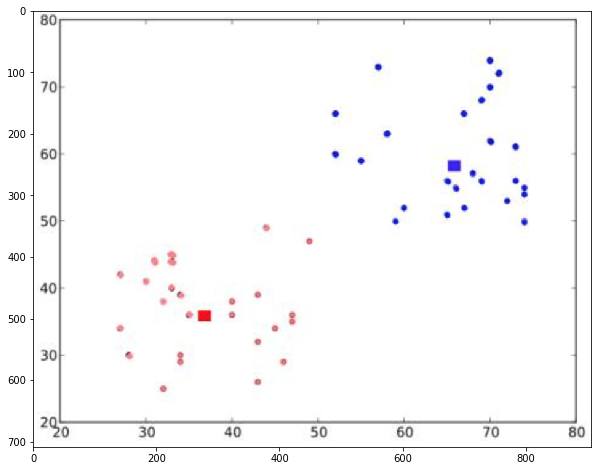

In [4]:
datos_1 = np.array(Image.open('data/k-means1.png'))
plt.figure(figsize=(10, 10))
plt.imshow(datos_1)

- Paso 3: A continuación, se calcula el promedio de todos los puntos azules y rojos por
separado y ese se usara como un nuevo centroide. Es decir, C1 y C2 se desplazan a los centroides 
recién calculados. Y nuevamente se realiza el paso 2 con los nuevos centroides y se etiquete los datos
con '0' y '1'.

Los resultados se visualizan abajo.

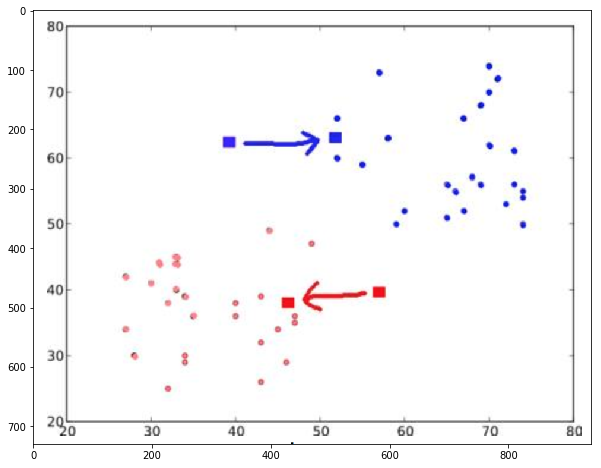

In [5]:
datos_2 = np.array(Image.open('data/k-means2.png'))
plt.figure(figsize=(10, 10))
plt.imshow(datos_2)

Ahora el Paso 2 y el Paso 3 se iteran hasta que ambos centroides convergen en puntos fijos. O hasta que un número máximo de iteraciones se alcanza. 

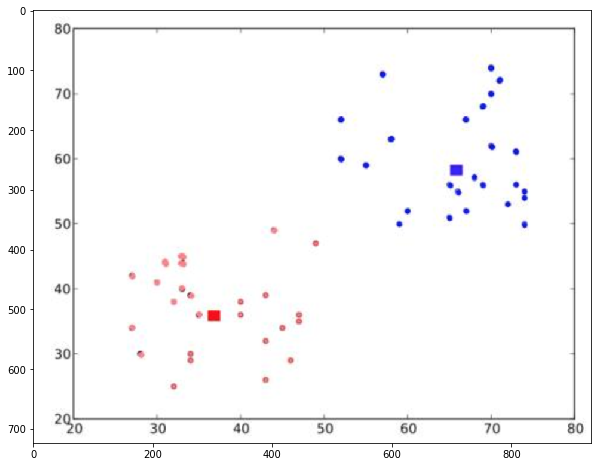

In [6]:
datos_3 = np.array(Image.open('data/k-means3.png'))
plt.figure(figsize=(10, 10))
plt.imshow(datos_3)

En resumen, K-means es un algoritmo de agrupamiento. Su objetivo es particionar n puntos de datos en k clusters. 

Cada uno de los n puntos de datos se asignará a un grupo con la media más cercana. A la media de cada grupo se le llama "centroide" 
o "centro". En general, la aplicación de k-means produce k grupos separados de los n puntos de datos originales. 
Los puntos de datos dentro de un grupo particular se consideran "más similares" entre sí que los puntos de datos que pertenecen a otros grupos.

In [7]:
import numpy as np

#Antes de pasar a los ejemplos es importante mencionar que utilizaremos np.reshape 
#con frequencia

a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [8]:
#Reshape
a.reshape((3, 2))


array([[0, 1],
       [2, 3],
       [4, 5]])

## 4.0 K-means con Scipy

In [9]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

## Ejemplo 1.0

In [10]:
# Genereación de datos
data = vstack((rand(150,2) + array([.5,.5]),rand(150,2)))
data.shape

(300, 2)

In [11]:
# Computar K-Means con K = 2 (2 clusters)
centroids,_ = kmeans(data,2)

# Assignar cada punto a un cluster (etiquetando)
idx,_ = vq(data,centroids)

idx.shape


(300,)

In [12]:
#Todas los puntos (coor x) con label 0
data[idx==0,0]
#Todos los puntos (coor y) con label 0
data[idx==0,1]
#Todos los puntos (coor x) con label 1
data[idx==1,0]
#Todos los puntos (coor y) con label 1
data[idx==1,1]

array([0.62031668, 0.64780387, 0.61171215, 0.63284391, 0.72723417,
       0.74509449, 0.65385708, 0.53507287, 0.74704529, 0.67035469,
       0.9200885 , 0.52153255, 0.69728559, 0.65071392, 0.82644166,
       0.31612668, 0.6312256 , 0.47563829, 0.07973364, 0.16535752,
       0.19636771, 0.59306902, 0.21624186, 0.91646691, 0.96347609,
       0.64870594, 0.34986819, 0.45690039, 0.31231024, 0.55979784,
       0.94139464, 0.40526154, 0.14829933, 0.62465689, 0.39832277,
       0.09447957, 0.00149614, 0.68716355, 0.56278158, 0.26154542,
       0.84779543, 0.33168227, 0.88792509, 0.80619083, 0.12359242,
       0.39406695, 0.50597602, 0.46631759, 0.59903283, 0.90817236,
       0.41414551, 0.07293519, 0.44180771, 0.04999881, 0.48845722,
       0.23189112, 0.23512708, 0.31842388, 0.114178  , 0.19698116,
       0.96751206, 0.3770694 , 0.25929882, 0.18044341, 0.8863572 ,
       0.75565347, 0.35590774, 0.558294  , 0.09436415, 0.76385364,
       0.24742029, 0.65960384, 0.53330464, 0.22687577, 0.31596

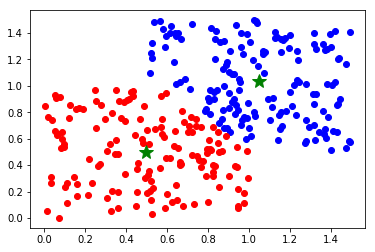

In [13]:
# Graficar los puntos que tienen el id
plot(data[idx==0,0],data[idx==0,1],'ob', data[idx==1,0],data[idx==1,1],'or')

plot(centroids[:,0],centroids[:,1],'*g', markersize=15)

show()

## Ejemplo 2.0

In [14]:
from scipy.cluster.vq import *
from scipy.misc import imresize
from pylab import *
from PIL import Image


In [15]:
steps = 50 #Imagen dividida en regiones de steps*steps

im = array(Image.open('data/empire.jpg'))

im

array([[[ 88, 133, 188],
        [ 86, 131, 186],
        [ 86, 131, 186],
        ...,
        [247, 248, 250],
        [246, 247, 249],
        [246, 247, 249]],

       [[ 89, 134, 189],
        [ 88, 133, 188],
        [ 88, 133, 188],
        ...,
        [246, 247, 249],
        [246, 247, 249],
        [246, 247, 249]],

       [[ 88, 135, 189],
        [ 87, 134, 188],
        [ 86, 133, 187],
        ...,
        [245, 246, 250],
        [245, 246, 250],
        [246, 247, 251]],

       ...,

       [[130, 177, 231],
        [131, 178, 232],
        [131, 178, 232],
        ...,
        [ 35,  40,  36],
        [ 36,  41,  37],
        [ 35,  41,  37]],

       [[130, 177, 231],
        [131, 178, 232],
        [131, 178, 232],
        ...,
        [ 36,  41,  37],
        [ 39,  44,  40],
        [ 37,  43,  39]],

       [[128, 178, 231],
        [130, 180, 233],
        [128, 178, 231],
        ...,
        [ 37,  42,  38],
        [ 36,  42,  38],
        [ 35,  41,  37]]

In [16]:
print ("Shape:", im.shape)

Shape: (800, 569, 3)


In [17]:
# Computar caracteristicas de color por region

im_2 = im.reshape(800 * 569, 3)

im_2 = im_2.astype('f')/255 #Lo paso float

In [18]:
# Clusterizacion (numero de clusters k=3)

centroids,_ = kmeans(im_2,5)

idx,_ = vq(im_2,centroids)

In [19]:
idx.shape

(455200,)

In [20]:
idx

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

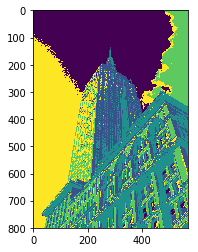

<Figure size 432x288 with 0 Axes>

In [21]:
# Crear imagen con cluster labels

codeim = (idx.reshape(im.shape[:2])).astype(int)

codeim.shape

# Visulizando

figure()
imshow(codeim)
show()

clf()


## 4.1 K-means con Sklearn

## Ejemplo 1.0: Colores Dominantes

Consideremos la imagen de colores que se encuentra encuentra abajo. Una de las preguntas que nos interesa responder hoy es ¿Cuáles son los colores dominantes? ¿Cuáles son los colores que están más representados en la imagen?. Inspeccionando rapidamente la imagen vemos que el fondo es en gran parte amarillo. Y que hay otros cuatro colores que se distribuyen uniformemente.

Ahora si quiesieramos crear un algoritmo para extraer automáticamente estos colores. ¿Cómo lo haríamos?

Para responder nuestra pregunta de interés, agruparemos las intensidades de píxeles de una imagen RGB. Dada una imagen de tamaño MxN, tenemos píxeles MxN, cada uno de los cuales 
consta de tres componentes: rojo, verde y azul respectivamente. Trataremos estos píxeles MxN como nuestros puntos de datos 
y los agruparemos usando k-means. Los píxeles que pertenecen a un clúster dado serán más similares en color que los píxeles que pertenecen 
a un clúster separado.

El siguiente ejemplo esta adaptado de 

https://buzzrobot.com/dominant-colors-in-an-image-using-k-means-clustering-3c7af4622036

In [22]:
import matplotlib.pyplot as plt
import utils
import cv2
import numpy as np


<Figure size 432x288 with 0 Axes>

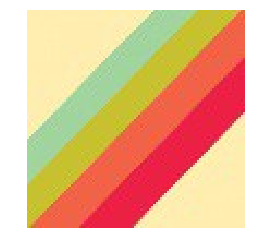

In [23]:
# Cargar la imagen and convertirla de BGR a RGB
image = cv2.imread('data/colore.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
# Desplegarla
plt.clf()
plt.figure()
plt.axis("off")
plt.imshow(image)
plt.show()

In [24]:
# Convertir a una lista de pixeles
print(image.shape)
image_2 = image.reshape((image.shape[0] * image.shape[1], 3))
print(image_2.shape)

(100, 100, 3)
(10000, 3)


In [25]:
#Explorando
image_2[0]

array([255, 238, 176], dtype=uint8)

Notamos que cada una de las dimensiones del arreglo corresponde a un canal. Ahora graficaremos los colores en 3D

<Figure size 432x288 with 0 Axes>

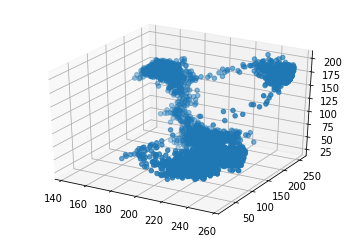

In [26]:
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = image_2[:,0]#Rojo
y = image_2[:,1]#Verde
z = image_2[:,2]#Azul

ax.scatter(x,y,z, marker="o")

plt.show()

Utilizamos la implementación scikit-learn de k-means para evitar tener 
que volver a implementarla.

In [27]:
from sklearn.cluster import KMeans
clt = KMeans(n_clusters = 5)
clt.fit(image_2)

COLORS = clt.cluster_centers_ #Centroides
LABELS = clt.labels_


In [28]:
#Notamos que los centrides de los clusters nos entregan los colores resprentativos de la imagen

COLORS.astype(int)

array([[239,  98,  69],
       [253, 236, 175],
       [199, 191,  50],
       [163, 211, 155],
       [233,  33,  68]])

Usemos Pandas para hacer la visualizacion más facil

In [29]:
import pandas as pd
df_image=pd.DataFrame({'r': image_2[:,0], 'g': image_2[:,1], 'b': image_2[:,2]})
df_image=df_image[['r','g','b']]
df_image

,r,g,b
0,255,238,176
1,255,238,176
2,255,237,175
3,255,237,175
4,255,237,175
5,255,237,175
6,255,238,176
7,255,238,176
8,255,238,176
9,255,238,176


In [30]:
#Quiero saber los colores dominantes
COLORS.astype(int)

array([[239,  98,  69],
       [253, 236, 175],
       [199, 191,  50],
       [163, 211, 155],
       [233,  33,  68]])

In [31]:
colors_labels=COLORS[LABELS]
colors_labels=colors_labels.astype(int)
colors_labels

array([[253, 236, 175],
       [253, 236, 175],
       [253, 236, 175],
       ...,
       [253, 236, 175],
       [253, 236, 175],
       [253, 236, 175]])

In [32]:
#Me voy a asegurar que los canales esten en el orden que yo quiero

df_image=df_image[['r','g','b']]

#Voy a agregar los centroides de los cluster, es decir los colores representativos

df_c=pd.DataFrame({'r_c': colors_labels[:,0], 'g_c': colors_labels[:,1], 'b_c': colors_labels[:,2]})
df_c=df_c[['r_c','g_c','b_c']]

#Concateno los canales y sus centroides o colores representativos
df_final = pd.concat([df_image, df_c], axis=1)
df_final

,r,g,b,r_c,g_c,b_c
0,255,238,176,253,236,175
1,255,238,176,253,236,175
2,255,237,175,253,236,175
3,255,237,175,253,236,175
4,255,237,175,253,236,175
5,255,237,175,253,236,175
6,255,238,176,253,236,175
7,255,238,176,253,236,175
8,255,238,176,253,236,175
9,255,238,176,253,236,175


In [33]:
df_final["LABEL"] = pd.Series(LABELS, index=df_image.index)
df_final['LABEL'].value_counts()

1    3109
0    2042
2    1823
4    1621
3    1405
Name: LABEL, dtype: int64

In [34]:
df_final

,r,g,b,r_c,g_c,b_c,LABEL
0,255,238,176,253,236,175,1
1,255,238,176,253,236,175,1
2,255,237,175,253,236,175,1
3,255,237,175,253,236,175,1
4,255,237,175,253,236,175,1
5,255,237,175,253,236,175,1
6,255,238,176,253,236,175,1
7,255,238,176,253,236,175,1
8,255,238,176,253,236,175,1
9,255,238,176,253,236,175,1


In [35]:
#Definimos una funcion que lea valores rgb y entregue el nombre del color 
def rgb_to_hex(r,g,b):
    return '#%02x%02x%02x' % (r,g,b)

In [36]:
#Probamos la funcion
rgb_to_hex(255,238,176)

'#ffeeb0'

In [37]:
#Agregamos una columna con el color que pintaremos cada marcador
df_final['COLOR'] = df_final.apply(lambda row: rgb_to_hex(row['r_c'], row['g_c'], row['b_c']), axis=1)
df_final

,r,g,b,r_c,g_c,b_c,LABEL,COLOR
0,255,238,176,253,236,175,1,#fdecaf
1,255,238,176,253,236,175,1,#fdecaf
2,255,237,175,253,236,175,1,#fdecaf
3,255,237,175,253,236,175,1,#fdecaf
4,255,237,175,253,236,175,1,#fdecaf
5,255,237,175,253,236,175,1,#fdecaf
6,255,238,176,253,236,175,1,#fdecaf
7,255,238,176,253,236,175,1,#fdecaf
8,255,238,176,253,236,175,1,#fdecaf
9,255,238,176,253,236,175,1,#fdecaf


In [38]:
#Usamos la columna color y creamos una lista para usarla en un grafico
colors = list(df_final['COLOR'])
colors


['#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#fdecaf',
 '#a3d39b',
 '#a3d39b',
 '#a3d39b',
 '#a3d39b',
 '#a3d39b',
 '#a3d39b',
 '#a3d39b',
 '#a3d39b',
 '#a3d39b',
 '#a3d39b',
 '#a3d39b',
 '#a3d39b',
 '#a3d39b',
 '#a3d39b',
 '#a3d39b',
 '#a3d39b',
 '#a3d39b',
 '#a3d39b',
 '#a3d39b',
 '#a3d39b',
 '#c7bf32',
 '#c7bf32',
 '#c7bf32',
 '#c7bf32',
 '#c7bf32',
 '#c

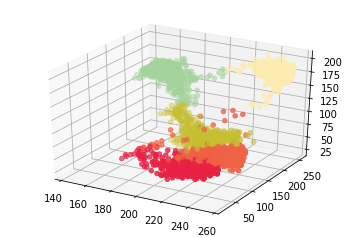

In [39]:
#Graficamos en 3D con los colores correctos
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = df_final['r'].astype(int)
y = df_final['g'].astype(int)
z = df_final['b'].astype(int)

ax.scatter(x,y,z, marker="o", color=colors)

plt.show()

El algoritmo k-means asigna cada píxel de nuestra imagen al clúster más cercano. 
Vamos a tomar el numero de  grupos y luego crearemos un histograma de la cantidad de píxeles 
asignados a cada grupo.


In [40]:
def plotHistogram(n_clusters, labels, colors):
    #L form 0 hasta no. de clusters
    numLabels = np.arange(0, n_clusters+1)
       
    #Creando tabla de frecuencias 
    (hist, _) = np.histogram(labels, bins = numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
        
        
    #descending order sorting as per frequency count
    colors = colors[(-hist).argsort()]
    hist = hist[(-hist).argsort()] 
        
    #Creando un chart vacio
    chart = np.zeros((50, 500, 3), np.uint8)
    start = 0
        
    #Creando rectangulos de colores
    for i in range(n_clusters):
        end = start + hist[i] * 500
            
        #Obtener los valores rgb
        r = colors[i][0]
        g = colors[i][1]
        b = colors[i][2]
            
        #Usando cv2.rectangle para dibujar
        cv2.rectangle(chart, (int(start), 0), (int(end), 50), (r,g,b), -1)
        start = end	
        
    #Desplegar
    plt.figure()
    plt.axis("off")
    plt.imshow(chart)
    plt.show()

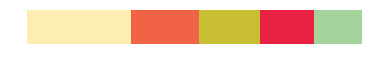

In [41]:
plotHistogram(5, LABELS, COLORS)

En esencia, todo lo que plotHistogram está haciendo es contar la cantidad de píxeles que 
pertenecen a cada grupo.

## Ejemplo 2.0: Compresion de Colores

El objetivo de este ejercicio es reducir el número de colores necesarios para mostrar una imagen del palacio 
de verano (China) de 16.777.216 colores a 16, conservando la calidad de apariencia general.

<Figure size 432x288 with 0 Axes>

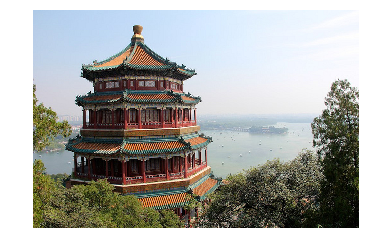

In [42]:
from sklearn.datasets import load_sample_image
china = cv2.imread('data/china.jpg')
china = cv2.cvtColor(china, cv2.COLOR_BGR2RGB)
 
# Desplegarla
plt.clf()
plt.figure()
plt.axis("off")
plt.imshow(china)
plt.show()


In [43]:
china.shape

(427, 640, 3)

In [44]:
china_2 = china / 255.0 # Colores entre 0...1
china_2 = china_2.reshape(427 * 640, 3)
china_2.shape

(273280, 3)

In [45]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(china_2)
new_colors = kmeans.cluster_centers_[kmeans.predict(china_2)]
new_colors

array([[0.74506855, 0.83376087, 0.93277311],
       [0.74506855, 0.83376087, 0.93277311],
       [0.74506855, 0.83376087, 0.93277311],
       ...,
       [0.1578976 , 0.1711329 , 0.13834423],
       [0.03742027, 0.03959367, 0.01800142],
       [0.03742027, 0.03959367, 0.01800142]])

In [46]:
china_recolored = new_colors.reshape(china.shape)
china_recolored.shape
china_recolored

array([[[0.74506855, 0.83376087, 0.93277311],
        [0.74506855, 0.83376087, 0.93277311],
        [0.74506855, 0.83376087, 0.93277311],
        ...,
        [0.93512212, 0.95440316, 0.98242174],
        [0.93512212, 0.95440316, 0.98242174],
        [0.93512212, 0.95440316, 0.98242174]],

       [[0.74506855, 0.83376087, 0.93277311],
        [0.74506855, 0.83376087, 0.93277311],
        [0.74506855, 0.83376087, 0.93277311],
        ...,
        [0.93512212, 0.95440316, 0.98242174],
        [0.93512212, 0.95440316, 0.98242174],
        [0.93512212, 0.95440316, 0.98242174]],

       [[0.74506855, 0.83376087, 0.93277311],
        [0.74506855, 0.83376087, 0.93277311],
        [0.74506855, 0.83376087, 0.93277311],
        ...,
        [0.93512212, 0.95440316, 0.98242174],
        [0.93512212, 0.95440316, 0.98242174],
        [0.93512212, 0.95440316, 0.98242174]],

       ...,

       [[0.38682598, 0.37824755, 0.19497549],
        [0.53435897, 0.48156863, 0.29719457],
        [0.38682598, 0

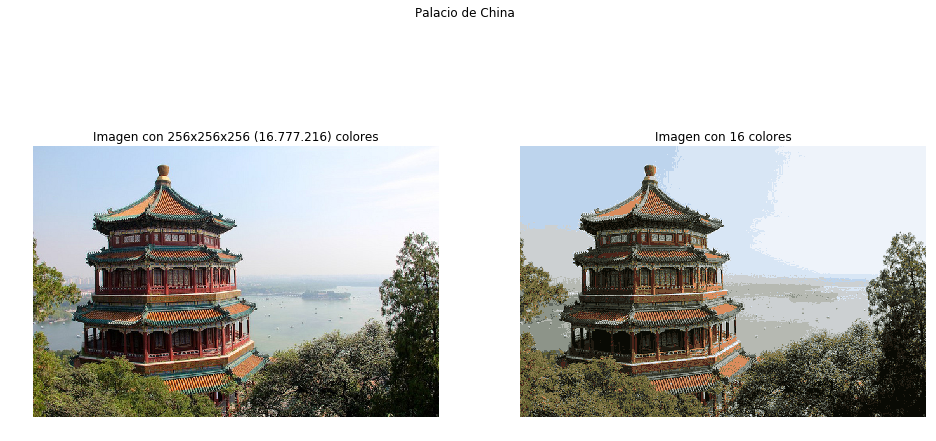

In [47]:
#Desplegando imagenes
plt.rcParams['figure.figsize'] = (16,8) #Aumentar el tamaño del canvas en Jupyter
plt.close("all")
plt.figure()
plt.suptitle("Palacio de China")
ax = plt.subplot("121")
ax.axis("off")
ax.imshow(china)
ax.set_title("Imagen con 256x256x256 (16.777.216) colores")

ax = plt.subplot("122")
ax.axis("off")
ax.imshow(china_recolored)
ax.set_title("Imagen con 16 colores")
plt.show()

## 4.2 K-Means con OpenCV

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('data/china.jpg')

Z = img.reshape((-1,3))

#Convertira a np.float32
Z = np.float32(Z)



In [49]:
#Definir criterio
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#Definir k (no de clusters)

K = 16



In [50]:
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [51]:
center #Nos entrega los colores (16)

array([[116.0458   , 160.19763  , 226.40536  ],
       [ 73.98251  , 102.983765 , 178.17862  ],
       [  7.4761825,  13.298472 ,  14.302721 ],
       [183.22746  , 186.07063  , 175.69029  ],
       [127.54455  , 154.82529  , 167.85608  ],
       [ 49.838055 ,  76.07582  ,  93.26267  ],
       [ 43.178497 ,  57.744038 ,  61.859444 ],
       [238.64192  , 216.59845  , 197.24266  ],
       [207.89967  , 205.98117  , 200.73303  ],
       [ 24.756569 ,  33.47622  ,  40.091713 ],
       [ 48.87138  , 108.51436  , 114.84667  ],
       [ 90.50457  ,  96.66246  ,  86.751686 ],
       [ 83.01878  , 113.135506 , 121.24789  ],
       [111.26756  , 132.55347  , 132.0991   ],
       [157.21268  , 157.21777  , 140.20221  ],
       [249.2024   , 240.98276  , 234.76335  ]], dtype=float32)

In [52]:
#Convertir de vuelta a uint8 y crear la imagen

center = np.uint8(center)

center

array([[116, 160, 226],
       [ 73, 102, 178],
       [  7,  13,  14],
       [183, 186, 175],
       [127, 154, 167],
       [ 49,  76,  93],
       [ 43,  57,  61],
       [238, 216, 197],
       [207, 205, 200],
       [ 24,  33,  40],
       [ 48, 108, 114],
       [ 90,  96,  86],
       [ 83, 113, 121],
       [111, 132, 132],
       [157, 157, 140],
       [249, 240, 234]], dtype=uint8)

In [53]:
res = center[label.flatten()]
res

array([[238, 216, 197],
       [238, 216, 197],
       [238, 216, 197],
       ...,
       [ 24,  33,  40],
       [  7,  13,  14],
       [  7,  13,  14]], dtype=uint8)

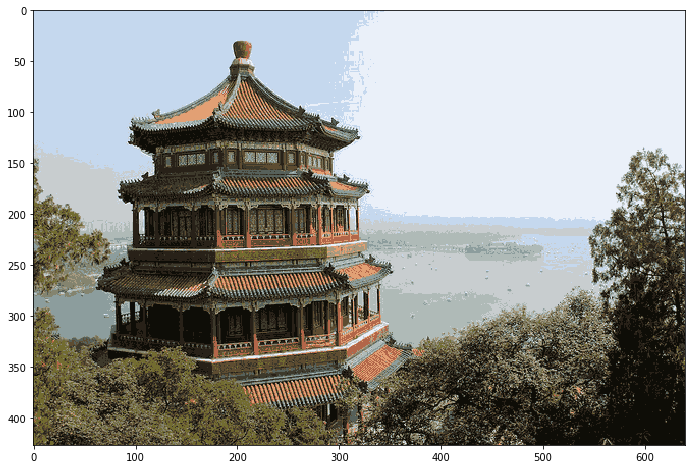

In [54]:
res2 = res.reshape((img.shape))

plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.show()


# 4.2 Agrupamiento Jerarquico (Hierarchical Clustering)

El agrupamiento jerárquico es un tipo de algoritmo de aprendizaje automático no supervisado 
que se utiliza para agrupar puntos de datos sin etiquetar. Al igual que K-means, la agrupación
jerárquica también agrupa los puntos de datos con características similares. 

En algunos casos, el resultado de la agrupación jerárquica y K-Means puede ser similares.

La idea del aglomeramiento jerarquico es construir un árbol de similitud basado en 'distancias' 
por pares. El algoritmo comienza con la agrupación de los dos objetos 'más cercanos' (según la distancia
entre vectores de características) y crea un nodo promedio en un árbol con los dos objetos
como hijos. Luego busca el siguiente par 'más cercano' entre los objetos restantes y calcula 
el siguiente nodo promedio, y así sucesivamente. 

Luego se pueden extraer grupos atravesando este árbol y deteniéndose en nodos con una distancia menor 
a algún umbral que luego determina el tamaño de cluster y el número de clusters.

El algoritmo puede utilizar diferentes metricas de distancia tales como la distancia euclideana
o la distancia euclideana al cuadrado o ser reemplazado por un creiterio más complicado 
(https://es.wikipedia.org/wiki/Agrupamiento_jer%C3%A1rquico).



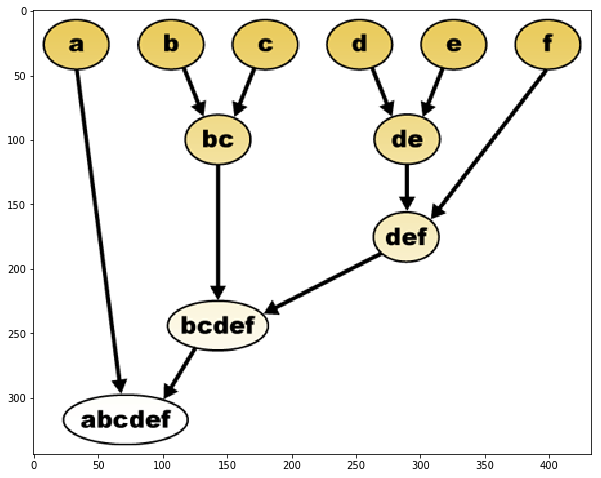

In [55]:
dendo = np.array(Image.open('data/Dendograma.png'))
plt.figure(figsize=(10, 10))
plt.imshow(dendo)

In [56]:
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from skimage.data import coins
from skimage.transform import rescale
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering


(303, 384)

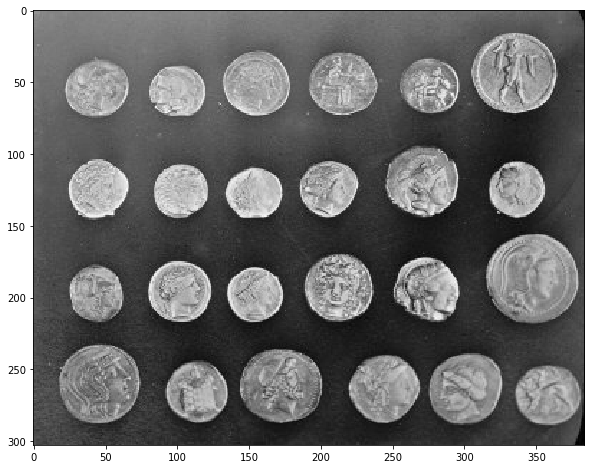

In [57]:
#Generando datos (coins esta includio en sklearn)
orig_coins = coins()
plt.imshow(orig_coins, cmap=plt.cm.gray)
orig_coins.shape

(303, 384)


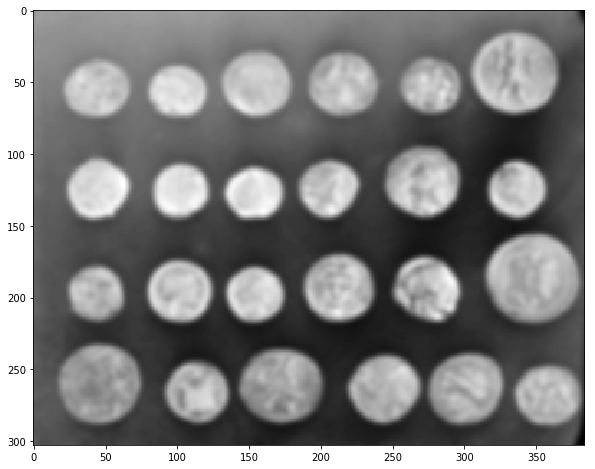

In [58]:
# Aplicamos un filtro gausseano para suavizar
smoothened_coins = gaussian_filter(orig_coins, sigma=2)
print(smoothened_coins.shape)
plt.imshow(smoothened_coins, cmap=plt.cm.gray)

(61, 77)


array([[0.50959853, 0.52156988, 0.51372549, ..., 0.38033121, 0.34862428,
        0.12501764],
       [0.50999679, 0.50607522, 0.50626182, ..., 0.36072253, 0.33325318,
        0.23390525],
       [0.50228222, 0.49412391, 0.49411765, ..., 0.34901961, 0.34117021,
        0.31695116],
       ...,
       [0.29021946, 0.28987464, 0.29019608, ..., 0.27071556, 0.29004329,
        0.12816942],
       [0.29433598, 0.27850401, 0.28216634, ..., 0.28280045, 0.28535027,
        0.07375546],
       [0.29419362, 0.26282024, 0.27823976, ..., 0.29816654, 0.2262007 ,
        0.0351789 ]])

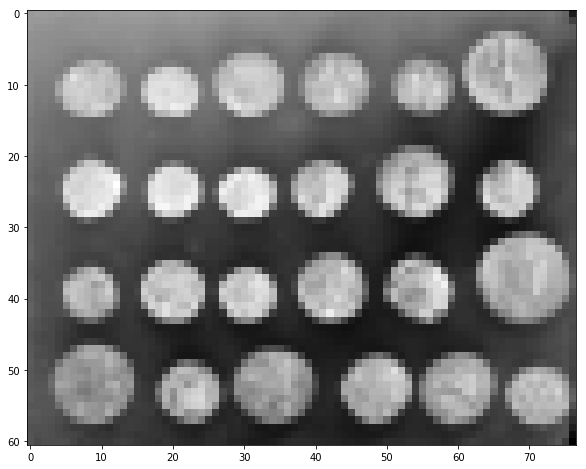

In [59]:
# Reducir el tamaño de la imagen aun 20% de la original para reducir el tiempo de proecesamientorescaled_coins= rescale(smoothened_coins, 0.2, mode="reflect")
rescaled_coins = rescale(smoothened_coins, 0.2, mode="reflect")
plt.imshow(rescaled_coins, cmap=plt.cm.gray)
print(rescaled_coins.shape)
rescaled_coins

In [60]:
X = np.reshape(rescaled_coins, (-1, 1)) #En vez de calcular nosotros las dimensiones de 
#la imagen actual y entregrarselas a reshape podemos usar -1 como parametro y el algoritmo 
#lo hará por nosotros. 

X.shape

(4697, 1)

In [61]:
# Compute clustering
print("Compute structured hierarchical clustering...")

n_clusters = 27 #Numero de clusters

connectivity = grid_to_graph(*rescaled_coins.shape)

#Para entender el metodo de war revisar https://es.wikipedia.org/wiki/M%C3%A9todo_de_Ward

#Otro buen link http://gael-varoquaux.info/scikit-learn-tutorial/unsupervised_learning.html

ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',connectivity=connectivity)

ward.fit(X)

Compute structured hierarchical clustering...


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=<4697x4697 sparse matrix of type '<class 'numpy.int64'>'
	with 23209 stored elements in COOrdinate format>,
            linkage='ward', memory=None, n_clusters=27,
            pooling_func=<function mean at 0x1096bd378>)

In [62]:
#Generando los labels para cada pixel
label = np.reshape(ward.labels_, rescaled_coins.shape)

label.shape


(61, 77)

In [63]:
print("Number of pixels: ", label.size)

print("Number of clusters: ", np.unique(label).size)

Number of pixels:  4697
Number of clusters:  27


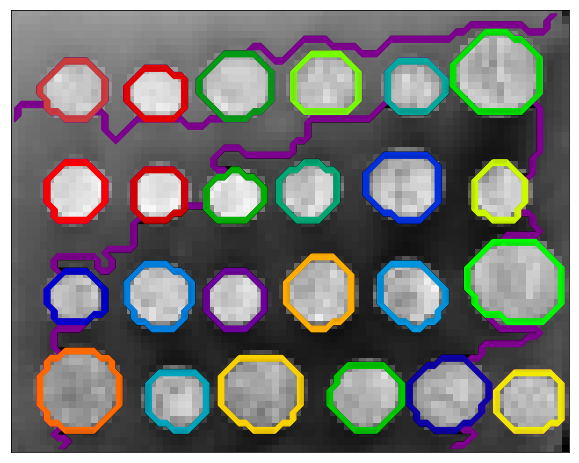

In [64]:
# Dibujar los resultados
plt.figure(figsize=(10, 10))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)

for l in range(n_clusters):
    plt.contour(label == l,colors=[plt.cm.nipy_spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()
